In [1]:
import numpy as np
import random
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from collections import Counter

In [3]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

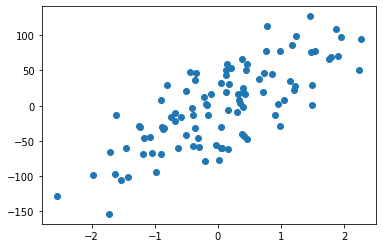

In [4]:
# посмотрим что получилось
plt.plot(x, y, 'o')
plt.show()

In [28]:
# преобразуем X к следующему виду, добавим классы
X = np.c_[x, y]
cl=np.array(np.where(X.T[1].T<(-50*X.T[0].T**7+20),0,1))
X.shape, cl.shape

((100, 2), (100,))

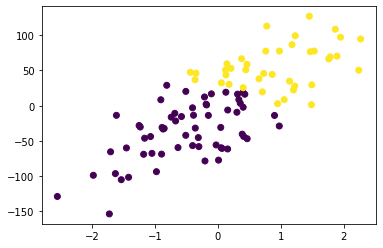

In [29]:
plt.scatter(X.T[0].T, X.T[1].T, c=cl)
plt.show()

Функции из лекции:

In [7]:
def HEntropy(l):
    length = len(l)
    cnt = Counter(l)
    
    ent = 0
    for cl in cnt.values():
        p = cl / length
        l2 = np.log2(p)
        it = -p * l2
        ent += it
    
    return ent

In [36]:
def IG(H, l, r_listy, l_listy):
    left_l = l[l_listy]
    right_l = l[r_listy]
    return H(l) - (len(left_l) / len(l)) * H(left_l) - (len(right_l) / len(l)) * H(right_l)

Построим простое дерево:

In [88]:
def best_decision(mat,Y):
    igmax=0
    crit=[0,0]
    for i in [0,1]:
        ent_0=HEntropy(Y)
        for j in np.sort(mat[i]):
            ign = IG(HEntropy, Y, 
                     [i for i,v in enumerate(mat[i]) if v > j],[i for i,v in enumerate(mat[i]) if v <= j])
            if ign > igmax: 
                igmax=ign
                crit[i]=j
    return crit

In [89]:
best_decision(X.T,cl)

[0.42833187053041766, 20.304404298083696]

Посмотрим, что получилось:

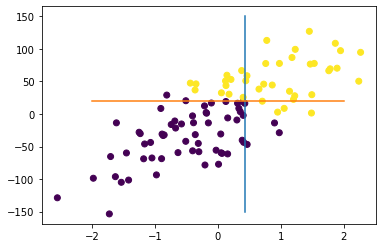

In [101]:
crit_=best_decision(X.T,cl)
plt.scatter(X.T[0].T, X.T[1].T, c=cl)
plt.plot([crit_[0]]*2,[-150,150], label="1")
plt.plot([-2,2],[crit_[1]]*2,label="2")
plt.show()